## Analyzing Projectiles

This notebook will consider the motion of simple projectiles traveling in two dimensions through dragless, linear, and quadratic drag media. It will consist of interactive widgets for users to explore this sort of system in different situations, accompanied as well by animated simulations. As such, the user should be able to compare the motions of the projectiles through different media. In the end, I hope for it to be come a useful teaching and learning tool, both from the physics and the programming standpoint.

### Projectiles with no drag

In the idealized case of no drag forces, the equations of motion for the trajectory of the projectile can be easily derived from Newton's second law. Letting $\mathbf{r} = \begin{pmatrix} x \\ y \end{pmatrix}$, and expressing the force on the projectile as $\mathbf{F} = m \ddot{\mathbf{r}} = m\dot{\mathbf{v}}$, we have

\begin{align*}
\sum \mathbf{F} = m \dot{\mathbf{v}} = 
\begin{pmatrix}
0 \\
-mg
\end{pmatrix}
\implies 
\mathbf{r}(t) = 
\begin{pmatrix}
x(t) \\
y(t)
\end{pmatrix}
=
\begin{pmatrix}
x_0 + v_{0,x}t  \\
y_0 + v_{0,y}t - \frac{1}{2}gt^2
\end{pmatrix}
\end{align*}

where $x_0, y_0$ are the initial $x$ and $y$ positions, $v_{0,x}, v_{0, y}$ are the initial velocities, and $g$ is the acceleration due to gravity. In the above, if we consider a projectile being launched at an angle $\theta$ from the horizontal with initial velocity $\mathbf{v}_0$, $\mathbf{r}(t)$ becomes 

\begin{align}
\mathbf{r}(t) =
\begin{pmatrix}
x_0 + v_0 t\cos\theta  \\
y_0 + v_0 t\sin\theta + \frac{1}{2}gt^2
\end{pmatrix}
\end{align}

Here we have separated the velocities into components as their projections onto the $x$ and $y$ axes. In the following cells, I will plot what this looks like.

In [2]:
#import the libraries we'll be using

import numpy as np
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd
import matplotlib.animation as animation
%matplotlib widget

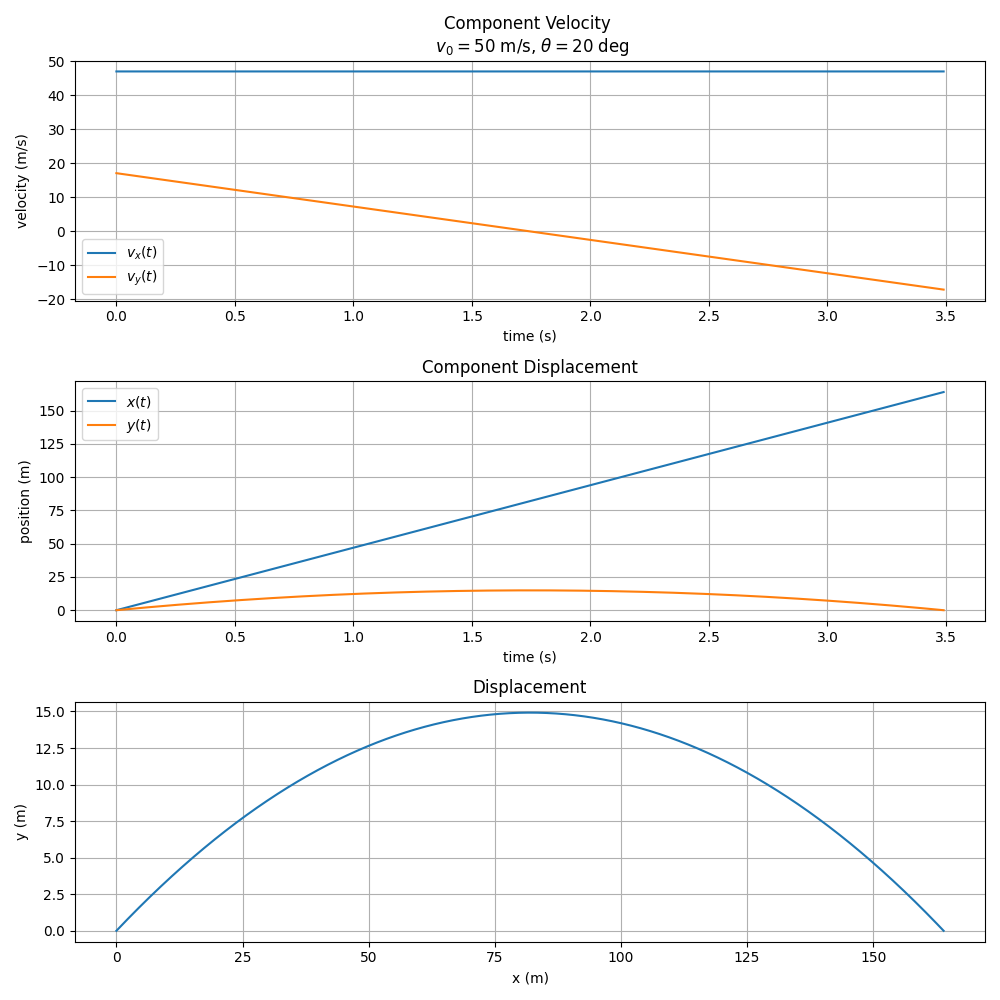

In [3]:
#define important variables
g = 9.8 #m/s2 --> gravity
m = 1 #kg --> mass of projectile
theta = 20 # degrees, function will later convert to radians

#initial positions
x0 = 0 #m
y0 = 0 #m
v0 = 50 #initial velocity, m/s

paramsNoDrag = [g, m, theta, x0, y0, v0]
tFinal = 2*(v0*np.sin(theta*np.pi/180))/g
t = np.linspace(0, tFinal, 10000)

def dragless(t, p):
    # p is the parameters for equation 1 above, t is an array for time
    # this will also calculate the velocities as functions of time
    phi = np.pi*p[2]/180
    x = p[3] + np.cos(phi) * v0 * t
    y = p[4] + np.sin(phi) * v0 * t - 0.5 * p[0]*t**2
    vx = v0 * np.cos(phi) * np.ones(len(t))
    vy = v0 * np.sin(phi) - p[0] * t
    return [x, y, vx, vy]

xoft, yoft, vxoft, vyoft = dragless(t, paramsNoDrag)

#make a graph of position and velocity
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].plot(t, vxoft, label='$v_x(t)$')
ax[0].plot(t, vyoft, label='$v_y(t)$')
ax[0].set_title('Component Velocity \n $v_0 = {}$ m/s, $\\theta = {}$ deg'.format(v0, theta))
ax[0].set_ylabel('velocity (m/s)')
ax[0].set_xlabel('time (s)')
ax[0].legend()


ax[1].plot(t, xoft, label='$x(t)$')
ax[1].plot(t, yoft, label='$y(t)$')
ax[1].set_title('Component Displacement')
ax[1].set_ylabel('position (m)')
ax[1].set_xlabel('time (s)')
ax[1].legend()

ax[2].plot(xoft, yoft)
ax[2].set_title('Displacement')
ax[2].set_xlabel('x (m)')
ax[2].set_ylabel('y (m)')

for a in ax:
    a.grid()

fig.tight_layout()
plt.show()

### Projectiles with linear drag

In  this section, I will consider projectiles with linear drag. For a thorough theoretical analysis, consider Chapter 2 of Taylor's Classical Mechanics, or [this](https://en.wikipedia.org/wiki/Drag_(physics)) wikipedia page for a brief discussion. 

Taking the sum of the forces to be $\sum F = m \dot{\mathbf{v}}$, we now have 

\begin{align*}
m \dot{\mathbf{v}} = 
\begin{pmatrix}
-\beta v_x \\
mg -\beta v_y 
\end{pmatrix}
\end{align*}

where $\beta$ is our drag coefficient. These are two independent first order linear differential equations in $x$ and $y$ whose solutions can be found by integrating: 

\begin{align*}
\frac{\text{d}v_x}{\text{d}t} = -\frac{\beta}{m} v_x \implies
v_x(t) = v_{0x} e^{-\frac{t}{\tau}}
\end{align*}

with $\tau = m/b$. For the velocity in the $y$ direction, we can write the equation for $v_y$ as

\begin{align*}
\dot{v_y}(t) =  g - \frac{\beta}{m}v_y = -\frac{b}{m}(v_y-v_{\text{ter}})
\end{align*}

where we introduce the terminal velocity $v_{\text{ter}} = mg/b$. Integrating this equation, one can find

\begin{align*}\tag{3}
v_y(t)
\end{align*}